In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,cohen_kappa_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score,LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier,VotingRegressor,StackingClassifier,StackingRegressor
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
pd.options.display.max_columns = None
pd.options.display.max_rows = 300
pd.options.display.precision = 3
np.set_printoptions(suppress=True)
import pickle

### Attributes

1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
test_data

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974        

In [4]:
train_data.drop(columns=['Unnamed: 0'],inplace=True)
test_data.drop(columns=['Unnamed: 0'],inplace=True)

**Setting id as index as it is a redundant column**


In [5]:
train_data.set_index('id',inplace=True)
test_data.set_index('id',inplace=True)

In [6]:
test_data

Gender      Customer Type  Age   Type of Travel     Class  \
id                                                                 
19556  Female     Loyal Customer   52  Business travel       Eco   
90035  Female     Loyal Customer   36  Business travel  Business   
12360    Male  disloyal Customer   20  Business travel       Eco   
77959    Male     Loyal Customer   44  Business travel  Business   
36875  Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
78463    Male  disloyal Customer   34  Business travel  Business   
71167    Male     Loyal Customer   23  Business travel  Business   
37675  Female     Loyal Customer   17  Personal Travel       Eco   
90086    Male     Loyal Customer   14  Business travel  Business   
34799  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
id                                              
19556              160                      5   
90035             2863                      1   
12360              192                      2   
77959             3377                      0   
36875             1182                      2   
...                ...                    ...   
78463              526                      3   
71167              646                      4   
37675              828                      2   
90086             1127                      3   
34799              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
id                                                                 
19556                                  4                       3   
90035                                  1                       3   
12360                                  0                       2   
77959                                  0                       0   
36875                                  3                       4   
...                                  ...                     ...   
78463                                  3                       3   
71167                                  4                       4   
37675                                  5                       1   
90086                                  3                       3   
34799                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
id                                                                    
19556              4               3                4             3   
90035              1               5                4             5   
12360              4               2                2             2   
77959              2               3                4             4   
36875              3               4                1             2   
...              ...             ...              ...           ...   
78463              1               4                3             4   
71167              4               4                4             4   
37675              5               2                1             2   
90086              3               4                4             4   
34799              5               4                2             2   

       Inflight entertainment  On-board service  Leg room service  \
id                                                                  
19556                       5                 5                 5   
90035                       4                 4                 4   
12360                       2                 4                 1   
77959                       1                 1                 1   
36875                       2                 2                 2   
...                       ...               ...               ...   
78463                       4                 3                 2   
71167                       4                 4       

# Lets Do Some Exploratory Data Analysis (EDA) on Train Data


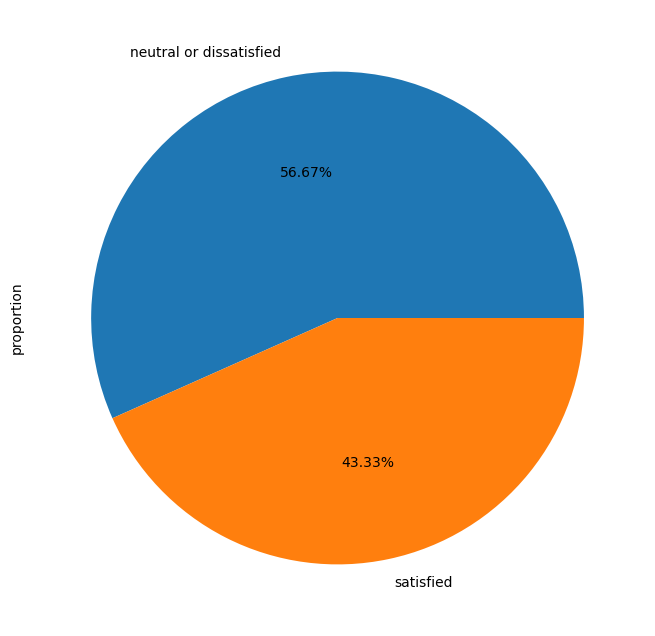

In [7]:
plt.figure(figsize=(8,8))
train_data['satisfaction'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

**Inference**

- More than 55% people are netural or dissatisfied with their flight


#### Seprating Number columns and categorical columns


In [8]:
cat_col = ['Gender', 'Customer Type','Type of Travel', 'Class','satisfaction']

In [9]:
num_col = ['Age','Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 
           'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding',
           'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 
           'Checkin service', 'Inflight service','Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

## Univariate Analysis


### Numerical Columns


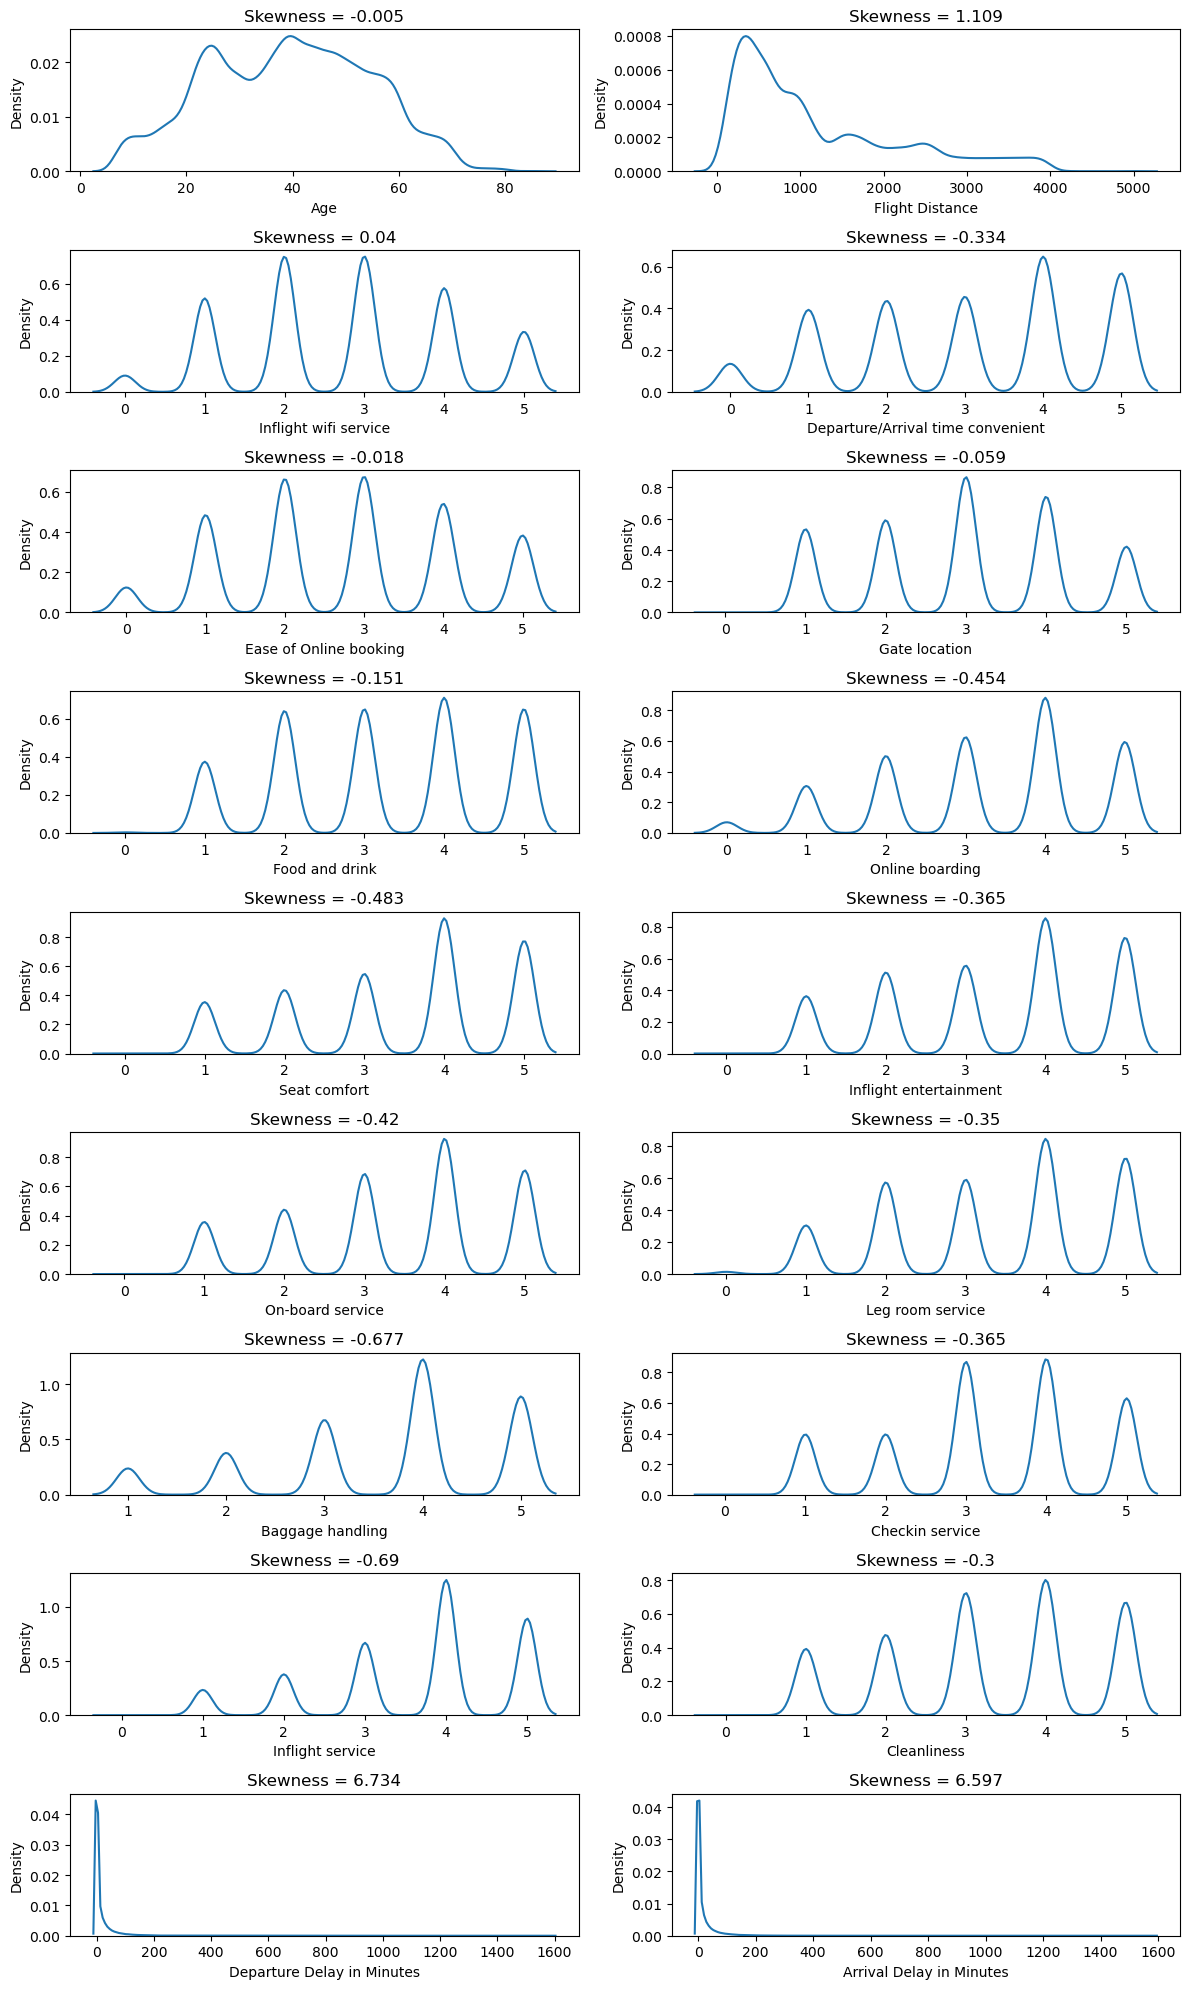

In [10]:
t=1
plt.figure(figsize=(12,20))
for i in num_col:
    plt.subplot(9,2,t)
    sns.kdeplot(train_data[i])
    plt.title(f'Skewness = {round(train_data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

**`Inference`:**

- As we can see from above plot there is right skewness in following columns:
  1. Flight Distance
  2. Departure Delay in minutes
  3. Arrival Delay in minutes
- This skewness is due to there are some extreme outliers present in the right tail of the columns above.


### Categorical Columns


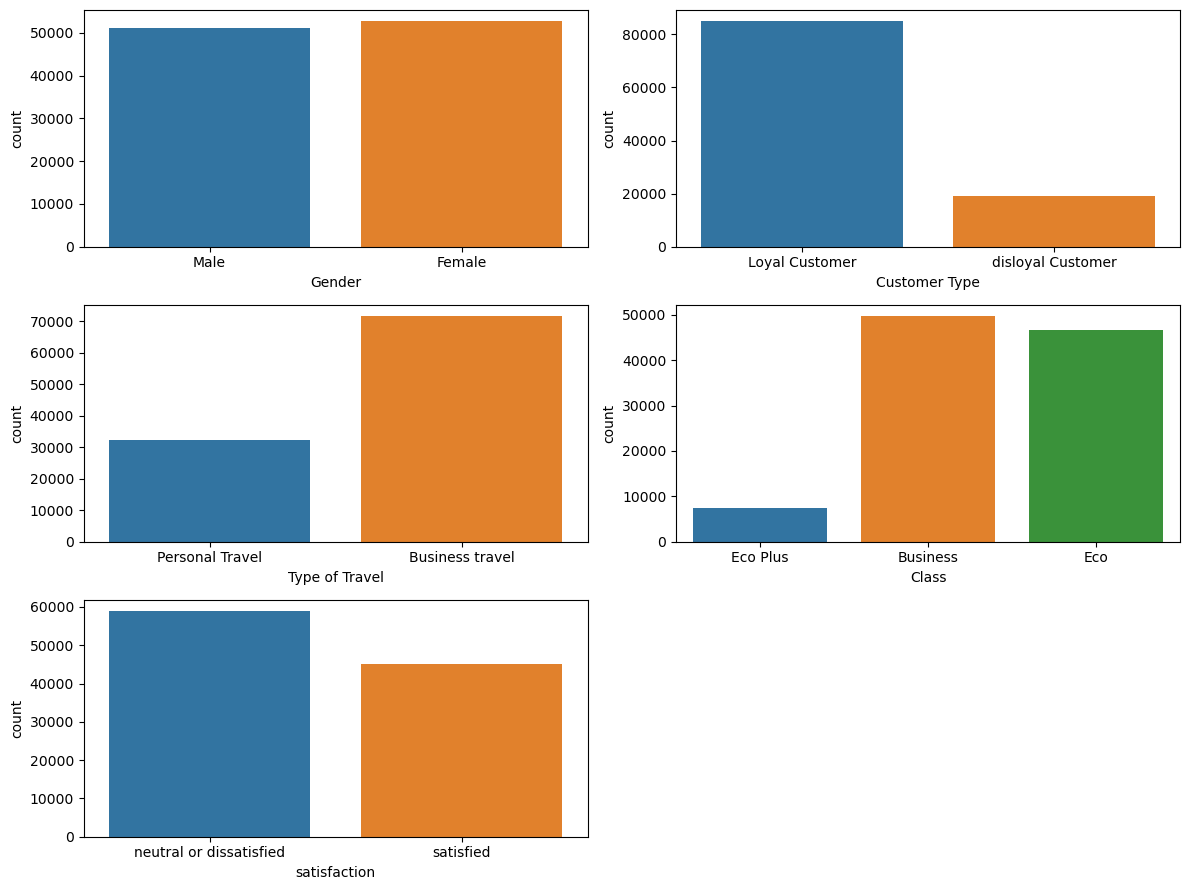

In [11]:
t=1
plt.figure(figsize=(12,9))
for i in cat_col:
    plt.subplot(3,2,t)
    sns.countplot(data = train_data,x=train_data[i],hue=i)
    t=t+1
plt.tight_layout()
plt.show()

**`Inference`:**

- `Male & Female ratio` are approximatily same.
- There are more number of `loyal customer` than disloyal customer
- People travel more by `buisness class`


## Bivariate Analysis


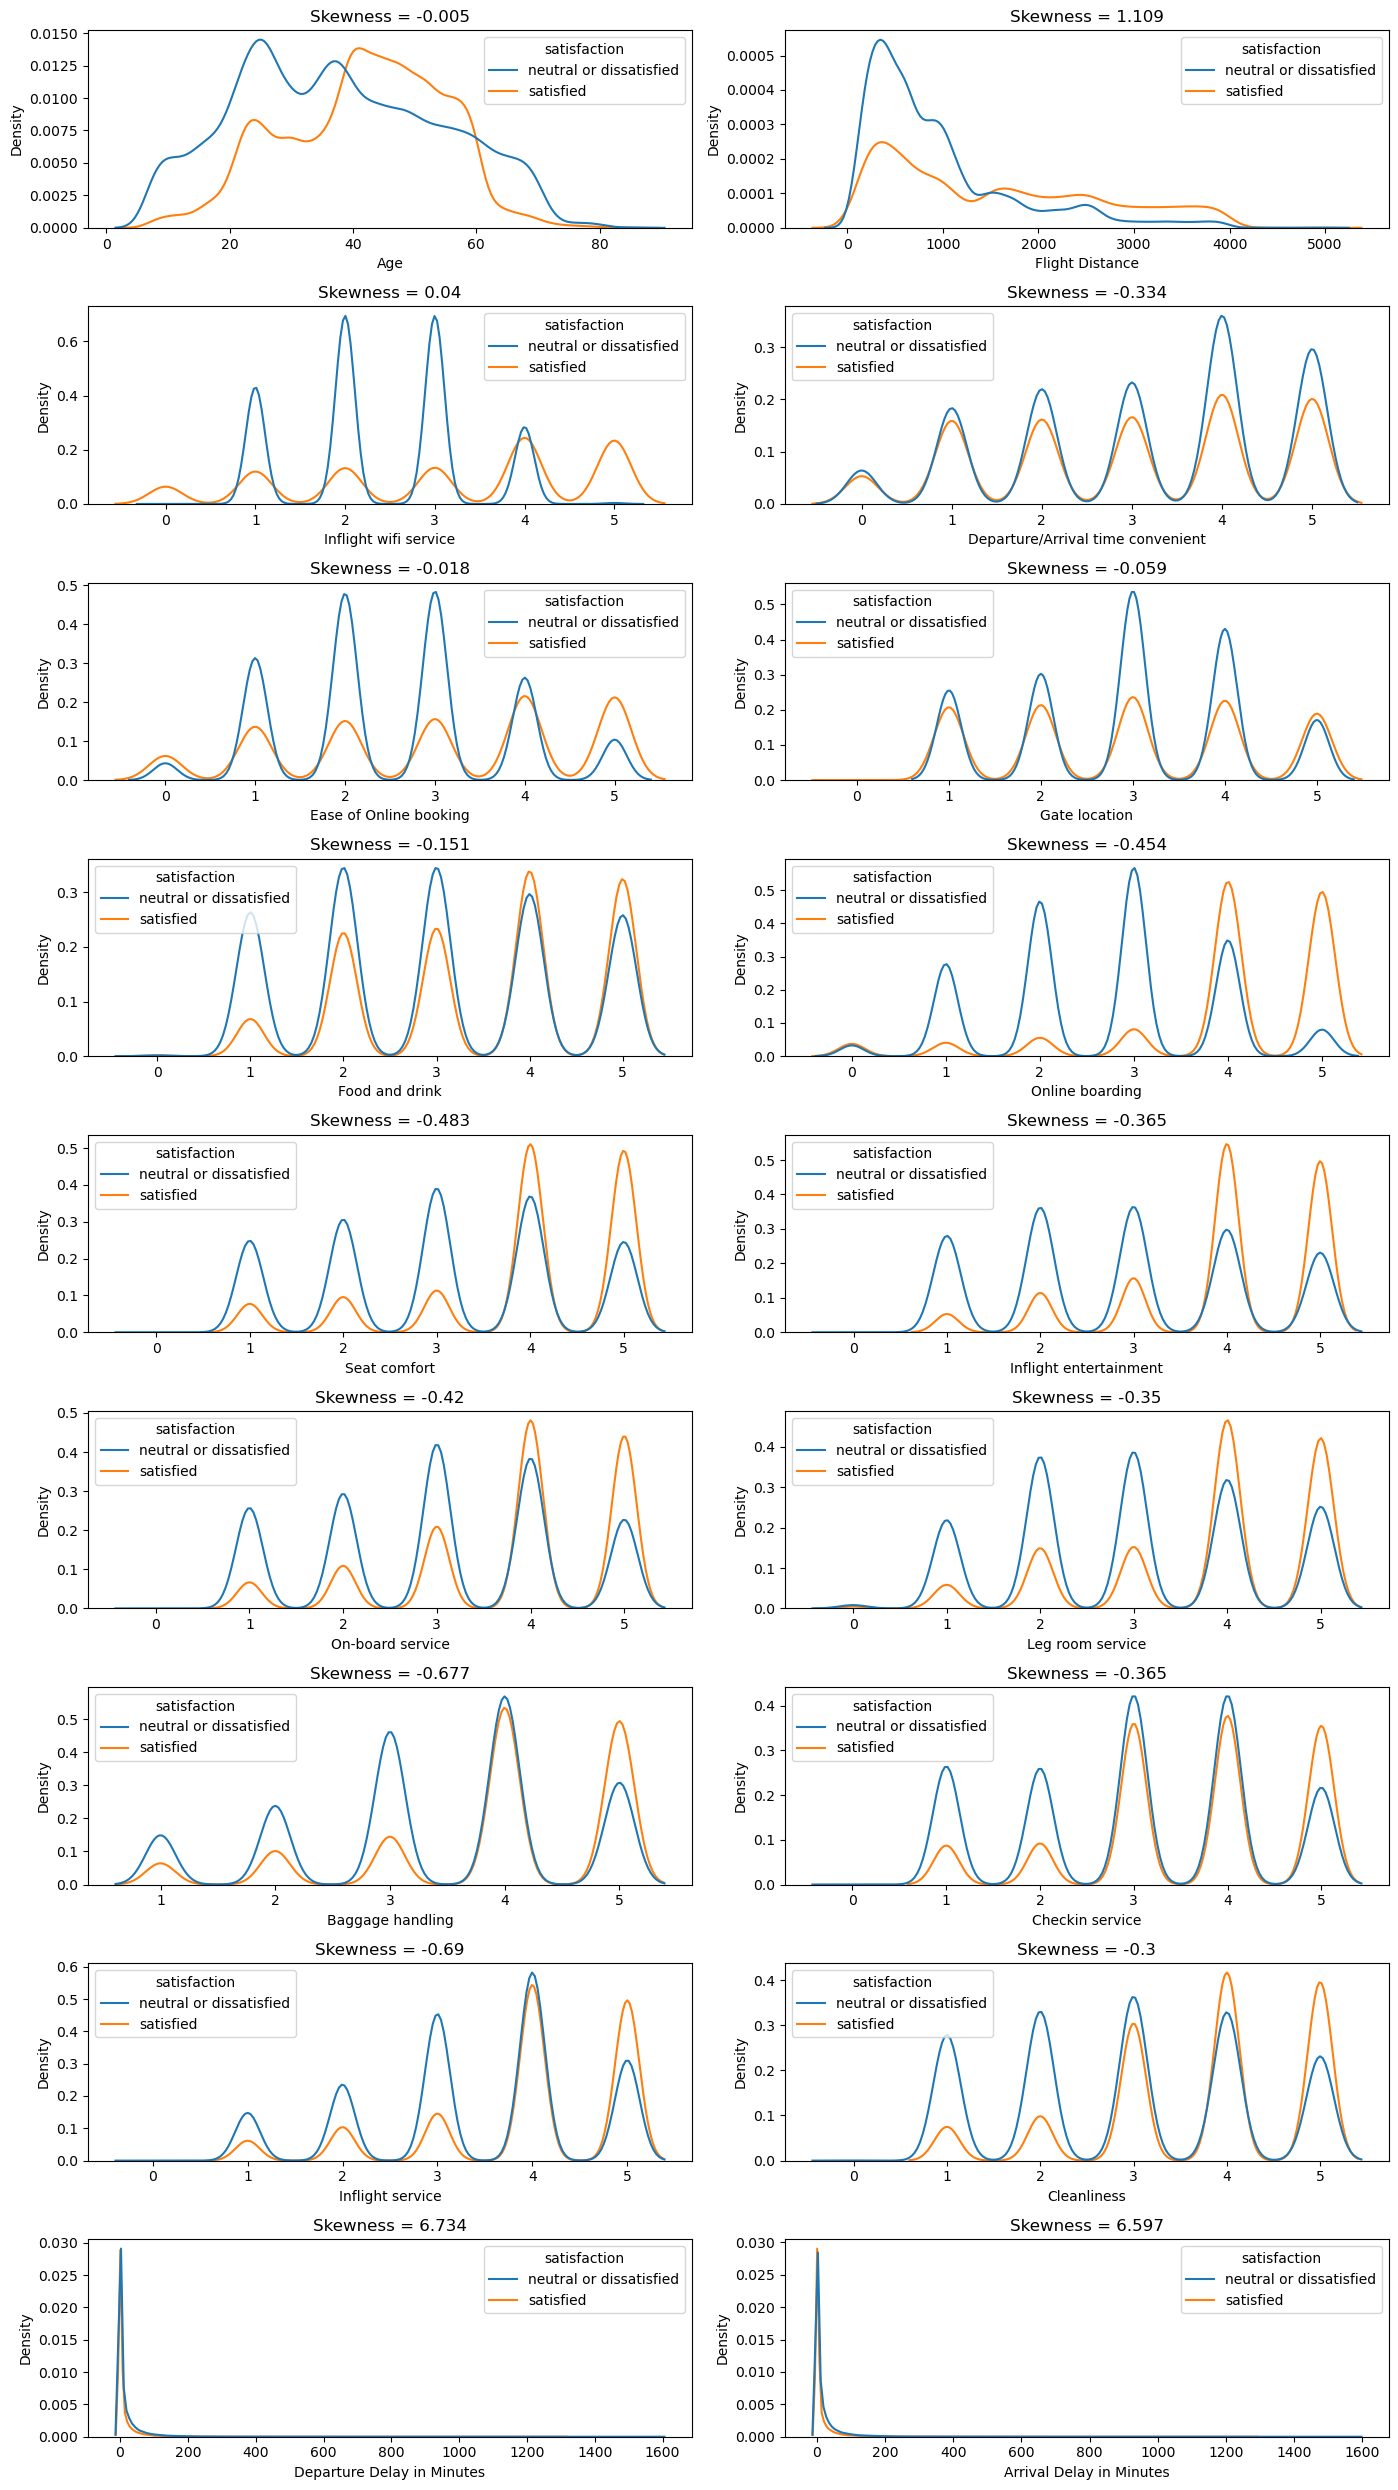

In [12]:
t=1
plt.figure(figsize=(14,25))
for i in num_col:
    plt.subplot(9,2,t)
    sns.kdeplot(data=train_data,x=i,hue=train_data['satisfaction'])
    plt.title(f'Skewness = {round(train_data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

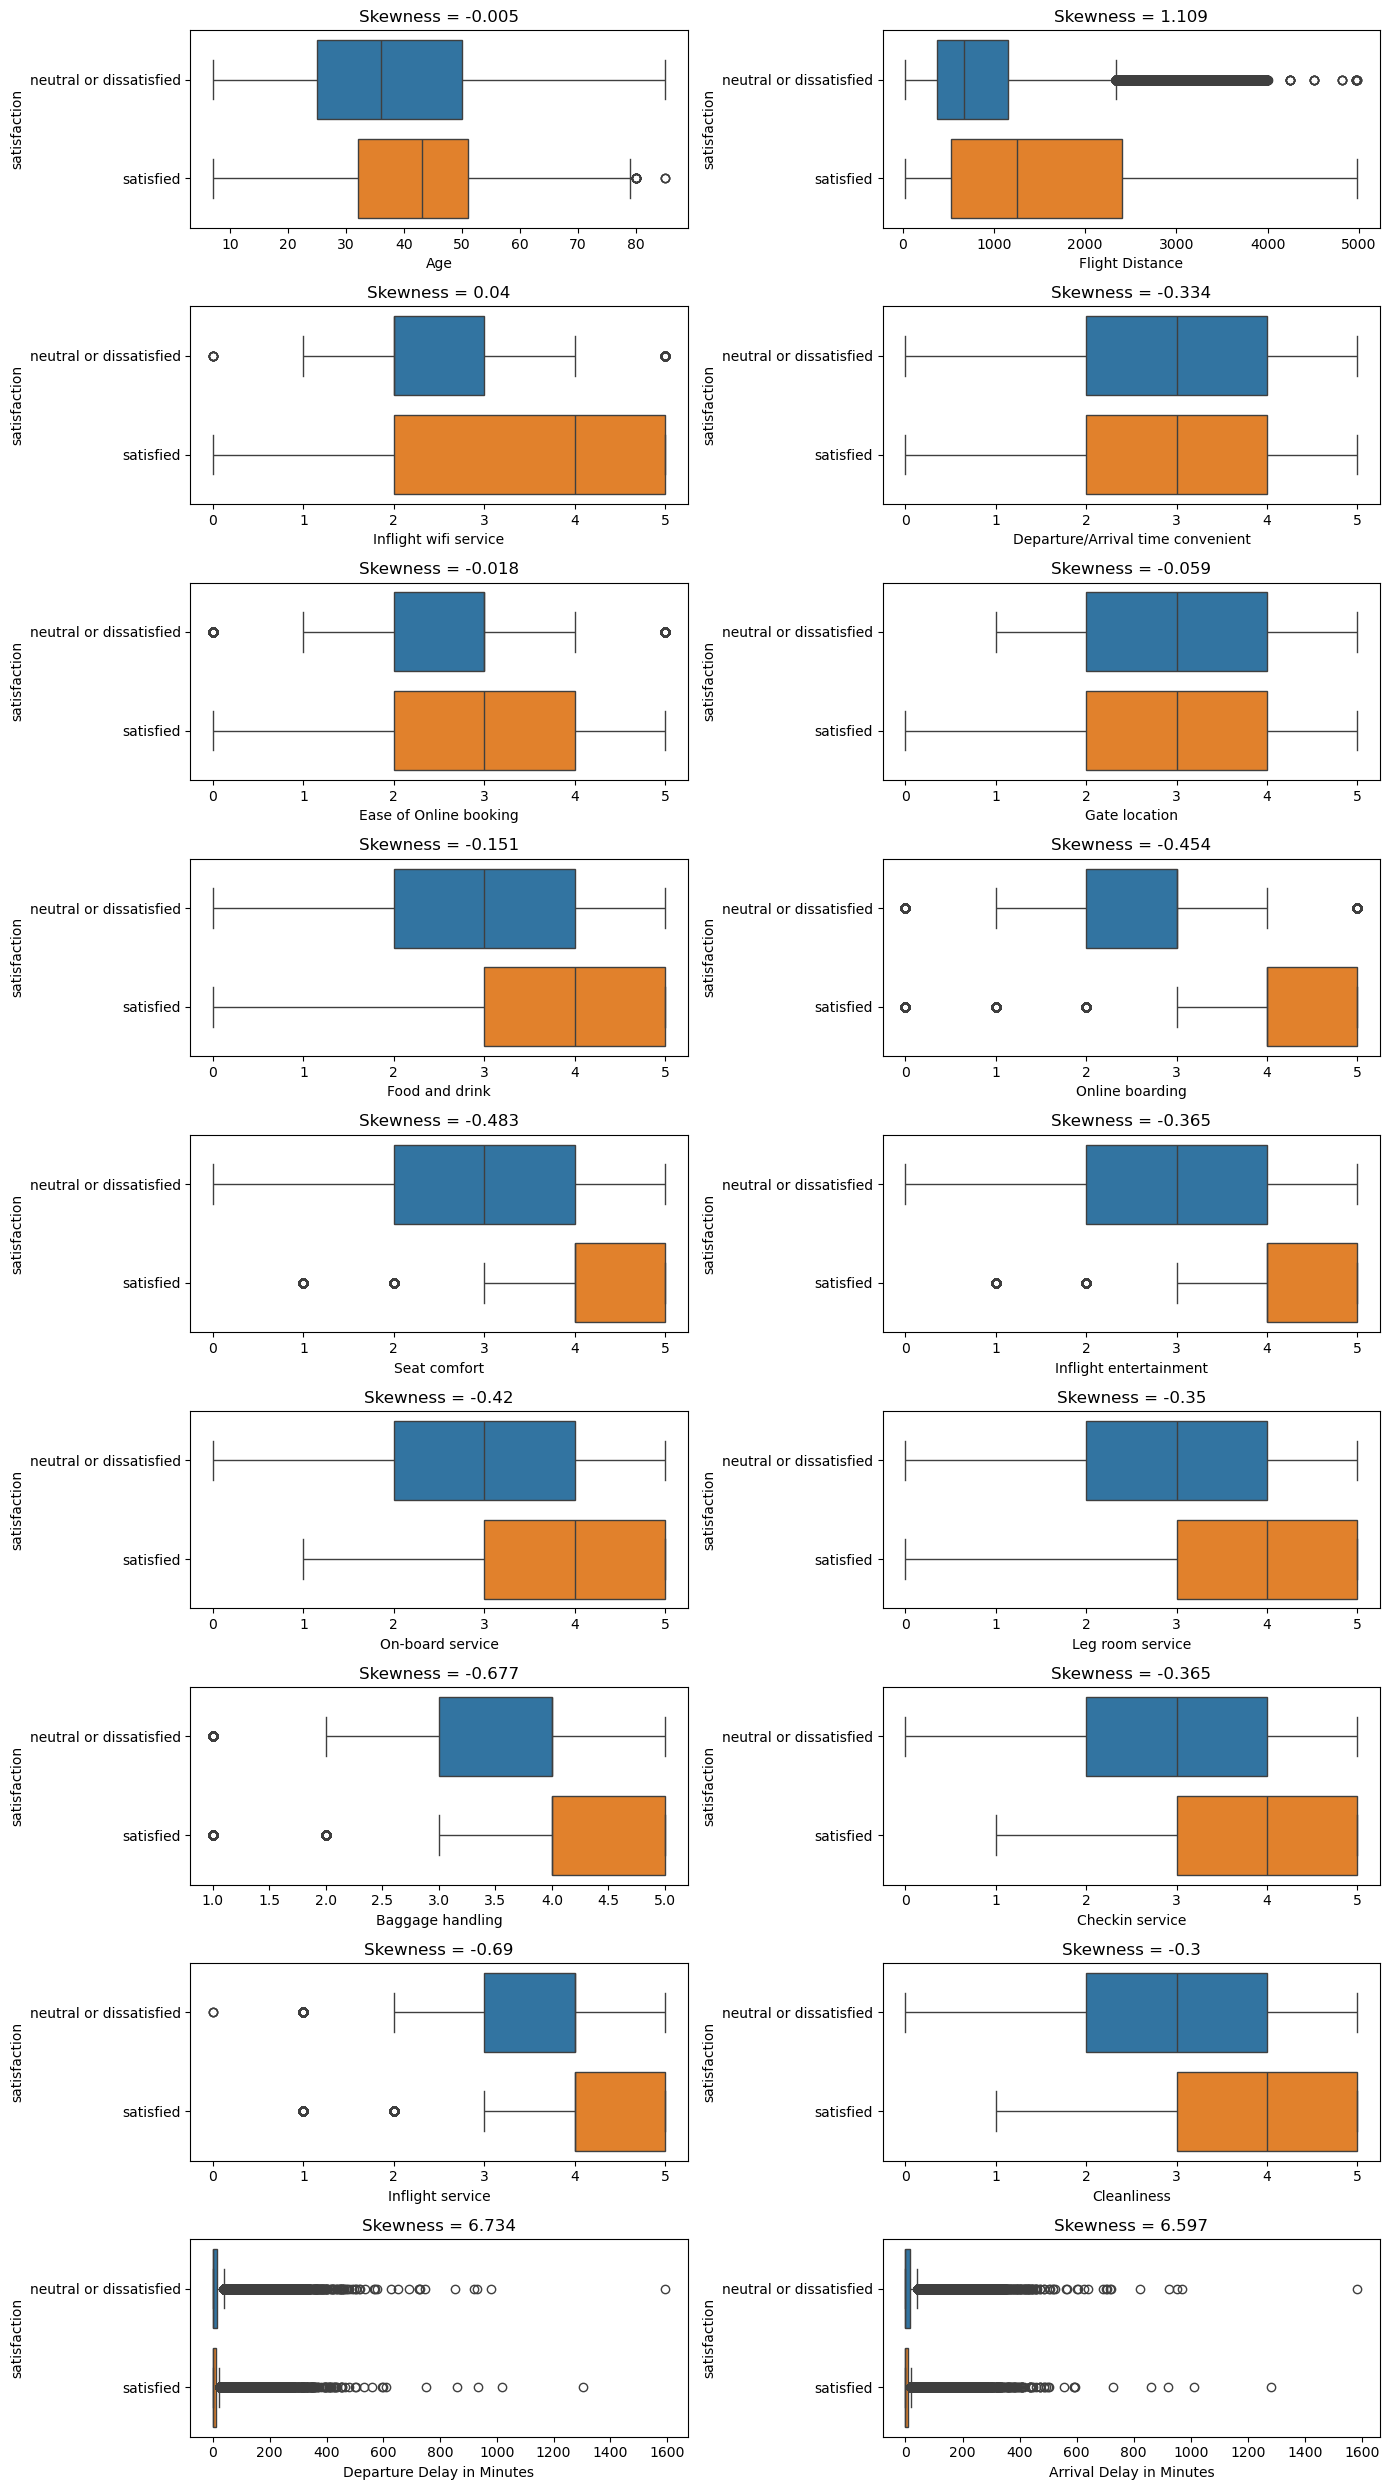

In [13]:
t=1
plt.figure(figsize=(14,25))
for i in num_col:
    plt.subplot(9,2,t)
    sns.boxplot(data=train_data,x=i,y=train_data['satisfaction'],hue=train_data['satisfaction'])
    plt.title(f'Skewness = {round(train_data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

**_`Inference`:_**

- Extreme outliers present on both the tails of class `Neutral & Dissatisfied` in following columns:

  1. Flight Distance
  2. Inflight wifi service
  3. ease of online booking
  4. Online boarding
  5. Inflight service
  6. Departure Delay in Minutes
  7. Arrival Delay in Minutes

- Extreme outliers present on the tails of class `Satisfied` in following columns:
  1. Age
  2. Online Boarding
  3. Seat comfort
  4. Inflight Entartainment
  5. Inflight service
  6. Baggage Handling
  7. Departure Delay in Minutes
  8. Arrival Delay in Minutes


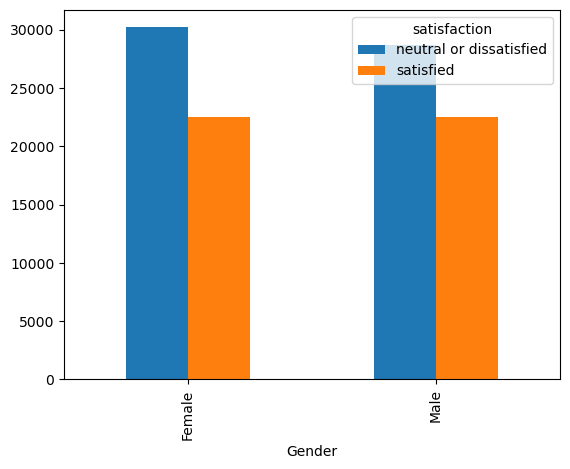

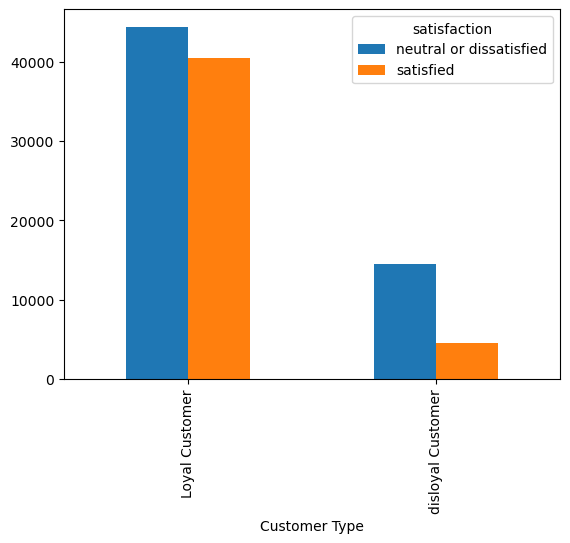

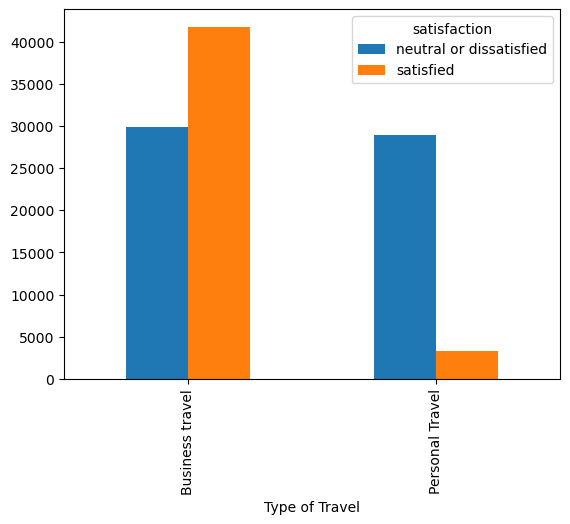

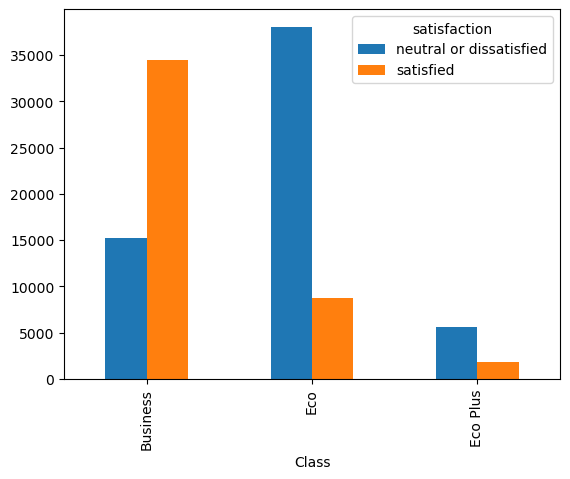

In [14]:
for i in cat_col:
    if i!= 'satisfaction':
        pd.crosstab(index=train_data[i],columns=train_data['satisfaction']).plot(kind='bar')
plt.show()

**`Inference`:**

- More number of male and female are `dissatisfied or neutral` from the flight comparing to `satisfied`.
- In `Buisness Travel` more number of people are `satisfied`
- In `Personal Travel` more number of people are `dissatisfied or neutral`
- In `Buisness Class` more number of people are `satisfied`
- In `Eco Class` more number of people are `dissatisfied or neutral`
- In `Eco Plus` more number of people are `dissatisfied or neutral`
- `Disloyal Customers` are more `dissatisfied or neutral` comparing to `Loyal Customers`.


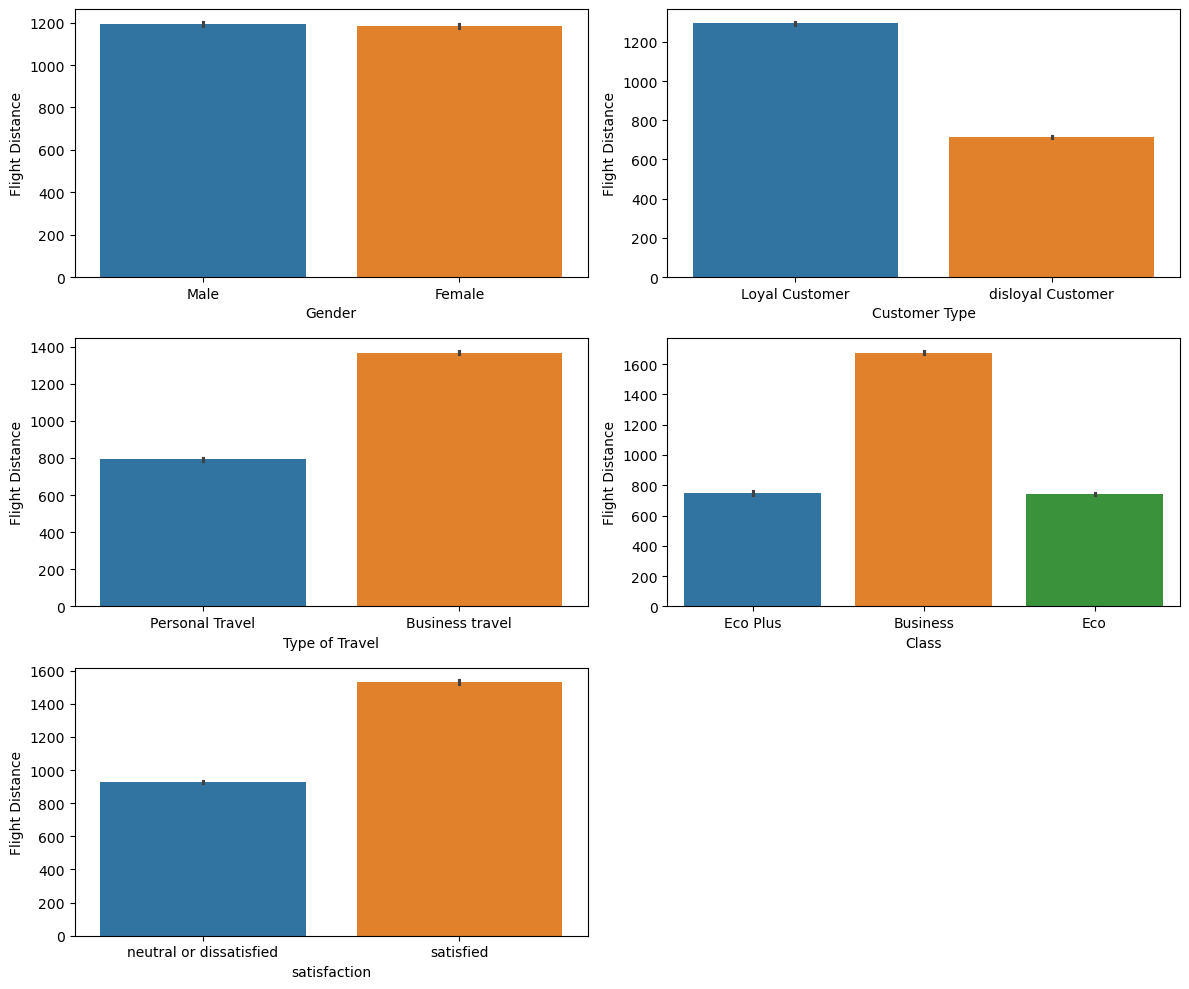

In [15]:
t=1
plt.figure(figsize=(12,10))
for i in cat_col:
    plt.subplot(3,2,t)
    sns.barplot(data=train_data,x=i,y=train_data['Flight Distance'],hue=i)
    t=t+1
plt.tight_layout()
plt.show()

**_`Inference: `_**

- `Disloyal customer` did not travel in flight where distance is `more than 700`
- When distance is `800 or less` more people travel in `Eco Class`
- when flight distance is `more than 900` people are `satisfied` with that flight


# Inferential Statistics


In [16]:
samp1 = train_data[train_data['satisfaction']=='neutral or dissatisfied']['Flight Distance']
samp2 = train_data[train_data['satisfaction']=='satisfied']['Flight Distance']
# Check for Assumptions
# Assumption 1 : Check for Normality
# Ho : The data is normal
# Ha : The data is not normal
test_stat,p_value = stats.shapiro(samp1)
test_stat,p_value = stats.shapiro(samp2)
print(f'test_stat = {test_stat} , p_value = {p_value}')
if p_value>0.05:
    print('Fail to reject Ho -- > The Data is normal')
else:
    print('Reject Ho --> The Data is not normal')

test_stat = 0.9169395738072912 , p_value = 4.5970612134491115e-90
Reject Ho --> The Data is not normal


In [17]:
# Assumption 2 : Variances should be equal
# Ho : variances are equal
# Ha : variances are not equal
test_p_value = stats.levene(samp1,samp2)
print(f'test_stat = {test_stat} , p_value = {p_value}')
if p_value>0.05:
    print('Fail to reject Ho -- > Variances are equal')
else:
    print('Reject Ho --> Variances are not equal')
# The data fails both the assumptions so we will apply some other non parametric test

test_stat = 0.9169395738072912 , p_value = 4.5970612134491115e-90
Reject Ho --> Variances are not equal


In [18]:
# To test if greater flight distance affect the satisfaction of people
# mu1 --> Avg distance of class 1
# mu2 --> Avg distance of class 2
# Ho: mu1<=mu2
# Ha: mu1>mu2
test_stat,p_value = stats.mannwhitneyu(samp1,samp2,alternative='greater')
print(f'test_stat = {test_stat} , p_value = {p_value}')
if p_value>0.05:
    print('Fail to reject Ho')
else:
    print('Reject Ho')

test_stat = 928190637.5 , p_value = 1.0
Fail to reject Ho


# Data Preprocessing


### Check for Defects


**Check for missing values**


In [19]:
train_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

**_`Inference`:_**

- There are some missing values in column `Arrival Delay in Minutes` so we have to drop them


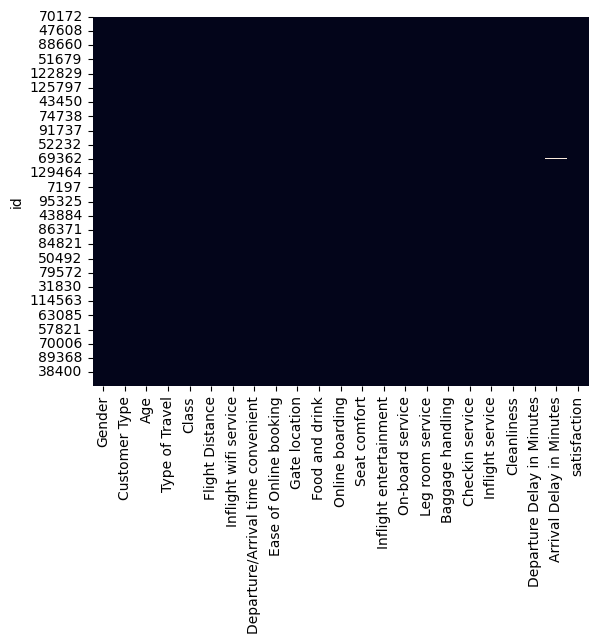

In [20]:
sns.heatmap(train_data.isnull(),cbar=False)
plt.show()

In [21]:
train_data.dropna(inplace=True)

In [22]:
test_data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

**_`Inference`:_**

- There are some missing values in column `Arrival Delay in Minutes` so we have to drop them


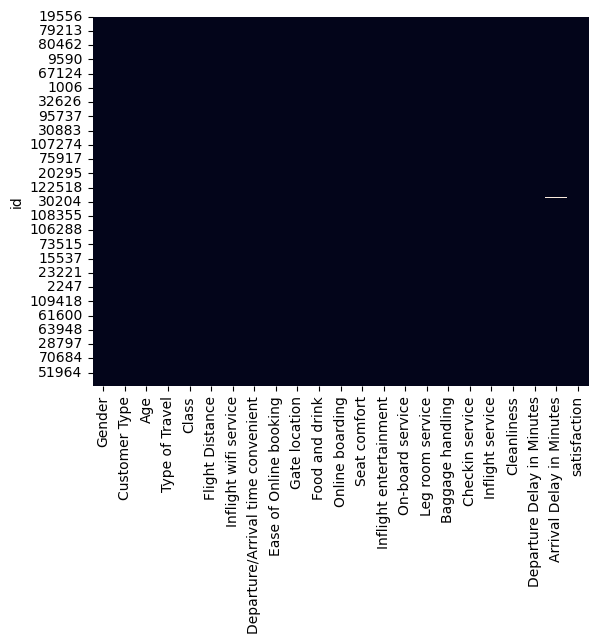

In [23]:
sns.heatmap(test_data.isnull(),cbar=False)
plt.show()

In [24]:
test_data.dropna(inplace=True)

**Check for duplicates**


In [25]:
train_data[train_data.duplicated()]

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

**_`Inference`:_**

- There are `NO duplicated` values in data


**Check for outliers**


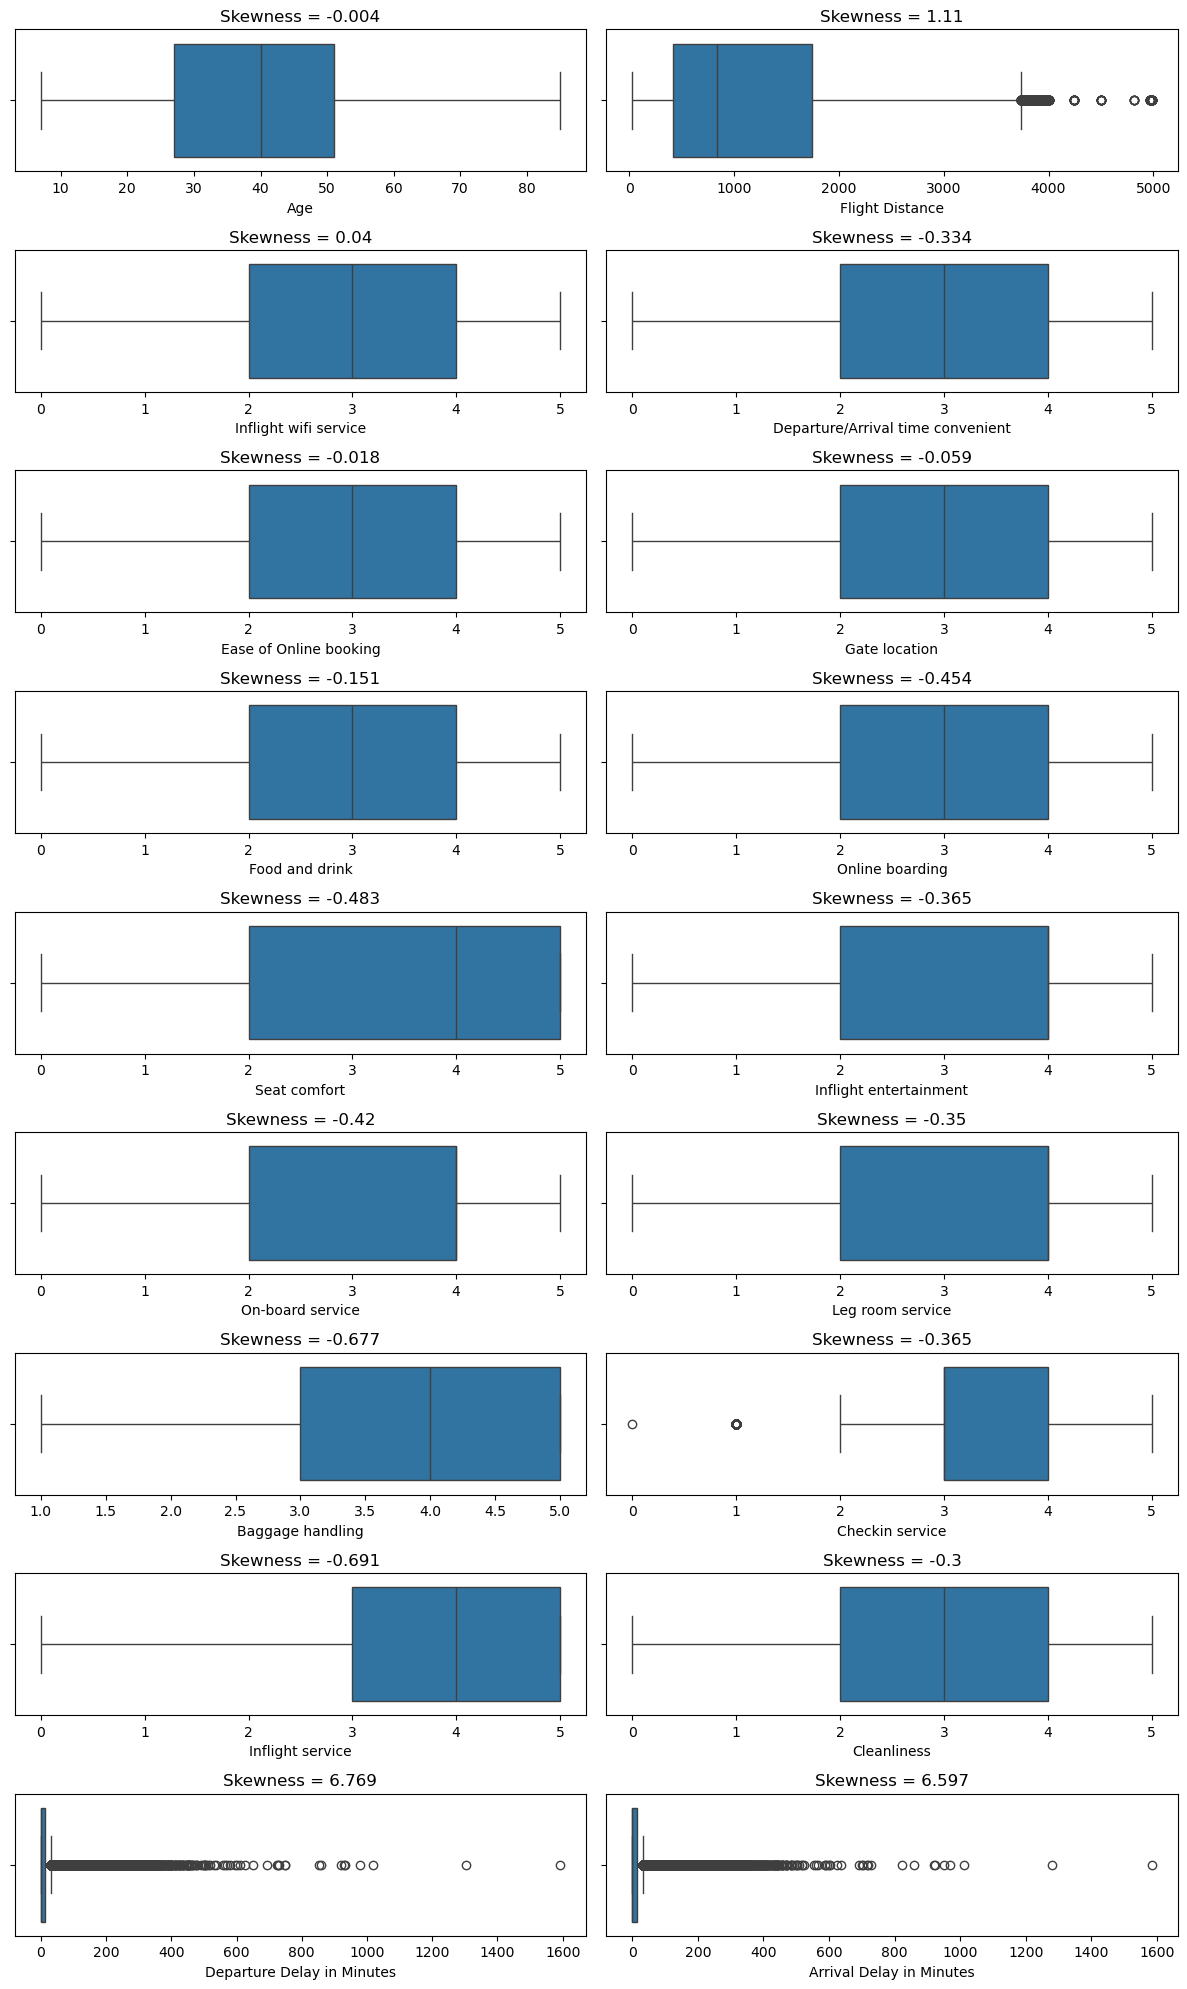

In [26]:
t=1
plt.figure(figsize=(12,20))
for i in num_col:
    plt.subplot(9,2,t)
    sns.boxplot(train_data[i],orient='h')
    plt.title(f'Skewness = {round(train_data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

**_`Inference:`_**

- There are some `extreme outliers` present in data so we have to `cap them` by `IQR method`


In [27]:
for i in num_col:
    q1,q3 = np.percentile(train_data[i],[25,75])
    iqr = q3-q1
    ll,ul = q1-1.5*iqr,q3+1.5*iqr
    train_data[i] = train_data[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

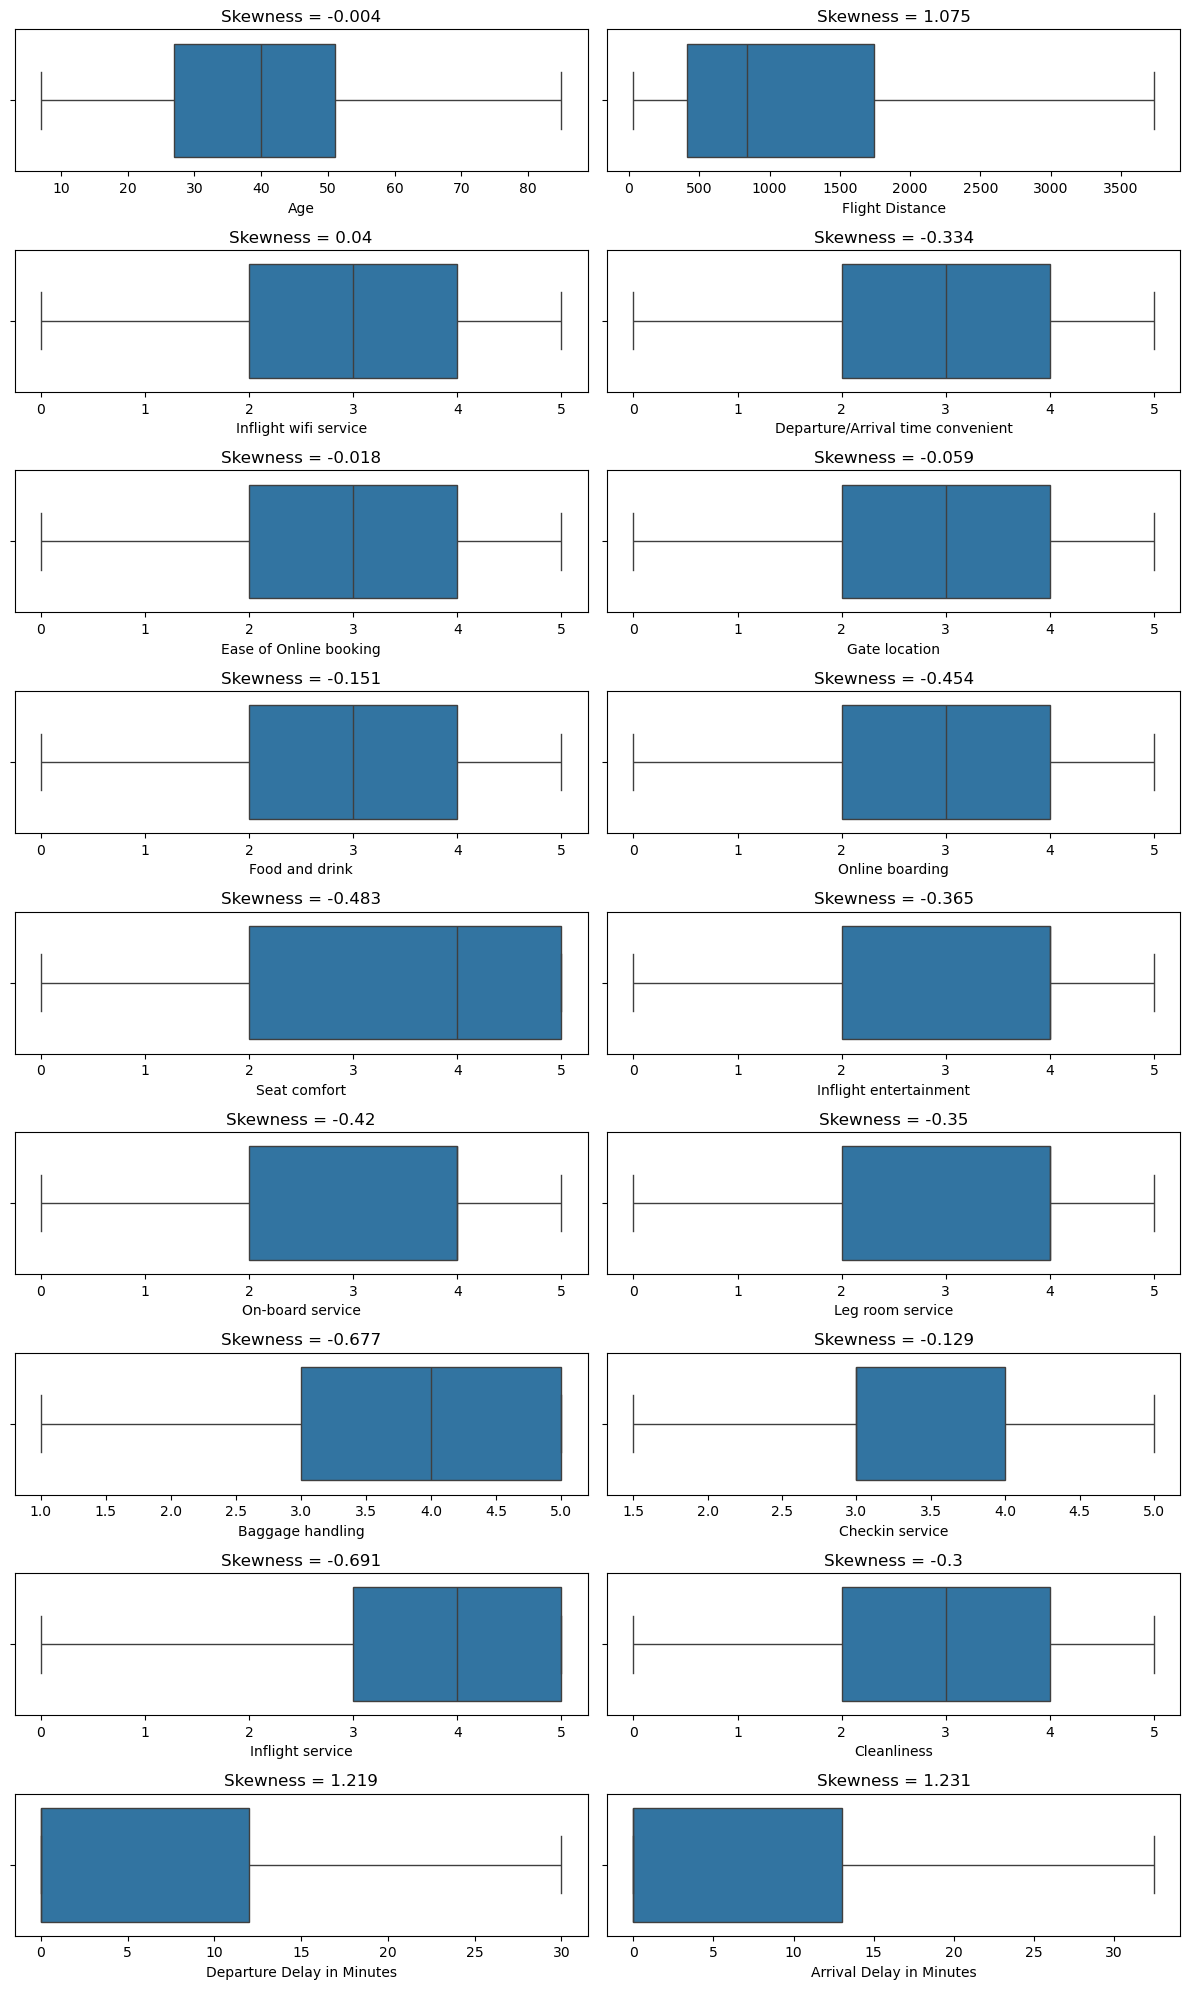

In [28]:
t=1
plt.figure(figsize=(12,20))
for i in num_col:
    plt.subplot(9,2,t)
    sns.boxplot(train_data[i],orient='h')
    plt.title(f'Skewness = {round(train_data[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

# Encoding


In [29]:
for i in cat_col:
    print(train_data[i].value_counts(normalize=True)*100)
    print('-------------------------')

Gender
Female    50.752
Male      49.248
Name: proportion, dtype: float64
-------------------------
Customer Type
Loyal Customer       81.725
disloyal Customer    18.275
Name: proportion, dtype: float64
-------------------------
Type of Travel
Business travel    68.986
Personal Travel    31.014
Name: proportion, dtype: float64
-------------------------
Class
Business    47.815
Eco         44.977
Eco Plus     7.209
Name: proportion, dtype: float64
-------------------------
satisfaction
neutral or dissatisfied    56.661
satisfied                  43.339
Name: proportion, dtype: float64
-------------------------


### Ordinal Encoding


**Gender**


In [30]:
train_data['Gender'] = train_data['Gender'].map({'Female':0,'Male':1}) 
test_data['Gender'] = test_data['Gender'].map({'Female':0,'Male':1}) 

**CustomerType**


In [31]:
train_data['Customer Type'] = train_data['Customer Type'].map({'disloyal Customer':0,'Loyal Customer':1})
test_data['Customer Type'] = test_data['Customer Type'].map({'disloyal Customer':0,'Loyal Customer':1})

**Type Of Travel**


In [32]:
train_data['Type of Travel'] = train_data['Type of Travel'].map({'Personal Travel':0,'Business travel':1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel':0,'Business travel':1})

**Class**


In [33]:
train_data['Class'] = train_data['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})
test_data['Class'] = test_data['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

**Satisfaction**


In [34]:
train_data['satisfaction'] = train_data['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [35]:
train_data.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
satisfacti

In [36]:
test_data.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

# Train Test Split


In [37]:
x_train = train_data.drop(columns=['satisfaction'])
y_train = train_data['satisfaction']
x_test = test_data.drop(columns=['satisfaction'])
y_test = test_data['satisfaction']

In [38]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(103594, 22) (103594,) (25893, 22) (25893,)


In [39]:
y_train.value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

# Predictive Modelling


In [77]:
mod = []
accu = []
rec = []
pre = []
f1 = []

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]

    print(f'Confusion Matrix : \n {confusion_matrix(ytest,pred_h)}')
    print(f'classification_report : \n {classification_report(ytest,pred_h)}')

    fpr,tpr,thres = roc_curve(ytest,pred_s)
    fig = px.line(x=fpr,y=tpr,title=f'ROC AUC : {roc_auc_score(ytest,pred_s):.3f}')
    fig.add_scatter(x=[0,1], y=[0,1],mode='lines',line=dict(color='red',dash = 'solid'), name='Model')
    fig.update_layout(xaxis_title='False Positive Rate',yaxis_title='True Positive Rate')
    fig.show()

    ans = input('Do you want to save the result: Y/N')
    if ans.lower() == 'y':
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        pre.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        global scorecard
        scorecard = pd.DataFrame({'Model':mod,'Accuracy':accu,'Recall':rec,'Precision':pre,
                                  'F1 Score':f1})
        print('\n result saved to scorcard')
    else:
        return

In [78]:
def tuning_parameters(grid,estimator,x,y,score = 'accuracy'):
    gscv = GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## Logistic Regression


In [79]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[12146  2382]
 [ 2727  8638]]
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     14528
           1       0.78      0.76      0.77     11365

    accuracy                           0.80     25893
   macro avg       0.80      0.80      0.80     25893
weighted avg       0.80      0.80      0.80     25893




 result saved to scorcard


In [80]:
scorecard

Model  Accuracy  Recall  Precision  F1 Score
0  LogisticRegression()     0.803    0.76      0.784     0.772

## KNN Classifier


In [81]:
x_train_s = x_train.copy()
x_test_s = x_test.copy()

In [82]:
sc  = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

In [83]:
model_validation(KNeighborsClassifier(),x_train_s,y_train,x_test_s,y_test)

Confusion Matrix : 
 [[13969   559]
 [ 1320 10045]]
classification_report : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     14528
           1       0.95      0.88      0.91     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.93     25893
weighted avg       0.93      0.93      0.93     25893




 result saved to scorcard


In [84]:
scorecard

Model  Accuracy  Recall  Precision  F1 Score
0    LogisticRegression()     0.803   0.760      0.784     0.772
1  KNeighborsClassifier()     0.927   0.884      0.947     0.914

## Naive Bayes


**GaussianNB**


In [85]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[13204  1324]
 [ 2547  8818]]
classification_report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     14528
           1       0.87      0.78      0.82     11365

    accuracy                           0.85     25893
   macro avg       0.85      0.84      0.85     25893
weighted avg       0.85      0.85      0.85     25893




 result saved to scorcard


In [86]:
scorecard

Model  Accuracy  Recall  Precision  F1 Score
0    LogisticRegression()     0.803   0.760      0.784     0.772
1  KNeighborsClassifier()     0.927   0.884      0.947     0.914
2            GaussianNB()     0.851   0.776      0.869     0.820

**MultinomialNB**


In [87]:
model_validation(MultinomialNB(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[10135  4393]
 [ 5498  5867]]
classification_report : 
               precision    recall  f1-score   support

           0       0.65      0.70      0.67     14528
           1       0.57      0.52      0.54     11365

    accuracy                           0.62     25893
   macro avg       0.61      0.61      0.61     25893
weighted avg       0.61      0.62      0.62     25893




 result saved to scorcard


In [88]:
scorecard

Model  Accuracy  Recall  Precision  F1 Score
0    LogisticRegression()     0.803   0.760      0.784     0.772
1  KNeighborsClassifier()     0.927   0.884      0.947     0.914
2            GaussianNB()     0.851   0.776      0.869     0.820
3         MultinomialNB()     0.618   0.516      0.572     0.543

**BernoulliNB**


In [89]:
model_validation(BernoulliNB(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[11163  3365]
 [ 2444  8921]]
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79     14528
           1       0.73      0.78      0.75     11365

    accuracy                           0.78     25893
   macro avg       0.77      0.78      0.77     25893
weighted avg       0.78      0.78      0.78     25893




 result saved to scorcard


In [90]:
scorecard

Model  Accuracy  Recall  Precision  F1 Score
0    LogisticRegression()     0.803   0.760      0.784     0.772
1  KNeighborsClassifier()     0.927   0.884      0.947     0.914
2            GaussianNB()     0.851   0.776      0.869     0.820
3         MultinomialNB()     0.618   0.516      0.572     0.543
4           BernoulliNB()     0.776   0.785      0.726     0.754

## Decision Tree


In [91]:
model_validation(DecisionTreeClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[13810   718]
 [  663 10702]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14528
           1       0.94      0.94      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893




 result saved to scorcard


In [92]:
scorecard

Model  Accuracy  Recall  Precision  F1 Score
0      LogisticRegression()     0.803   0.760      0.784     0.772
1    KNeighborsClassifier()     0.927   0.884      0.947     0.914
2              GaussianNB()     0.851   0.776      0.869     0.820
3           MultinomialNB()     0.618   0.516      0.572     0.543
4             BernoulliNB()     0.776   0.785      0.726     0.754
5  DecisionTreeClassifier()     0.947   0.942      0.937     0.939

**With Fine Tuning**


In [93]:
best_dt = tuning_parameters(grid={'max_depth':[7,8,9],
                       'min_samples_split':[2,3],'random_state':[1,3]},estimator=DecisionTreeClassifier()
                  ,x=x_train,y=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [94]:
best_dt

{'max_depth': 9, 'min_samples_split': 3, 'random_state': 3}

In [95]:
model_validation(DecisionTreeClassifier(**best_dt),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14022   506]
 [ 1056 10309]]
classification_report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     14528
           1       0.95      0.91      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893




 result saved to scorcard


In [96]:
scorecard

Model  Accuracy  Recall  \
0                               LogisticRegression()     0.803   0.760   
1                             KNeighborsClassifier()     0.927   0.884   
2                                       GaussianNB()     0.851   0.776   
3                                    MultinomialNB()     0.618   0.516   
4                                      BernoulliNB()     0.776   0.785   
5                           DecisionTreeClassifier()     0.947   0.942   
6  DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   

   Precision  F1 Score  
0      0.784     0.772  
1      0.947     0.914  
2      0.869     0.820  
3      0.572     0.543  
4      0.726     0.754  
5      0.937     0.939  
6      0.953     0.930

## Bagging Classifier


In [97]:
model_validation(BaggingClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14185   343]
 [  704 10661]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [98]:
scorecard

Model  Accuracy  Recall  \
0                               LogisticRegression()     0.803   0.760   
1                             KNeighborsClassifier()     0.927   0.884   
2                                       GaussianNB()     0.851   0.776   
3                                    MultinomialNB()     0.618   0.516   
4                                      BernoulliNB()     0.776   0.785   
5                           DecisionTreeClassifier()     0.947   0.942   
6  DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                BaggingClassifier()     0.960   0.938   

   Precision  F1 Score  
0      0.784     0.772  
1      0.947     0.914  
2      0.869     0.820  
3      0.572     0.543  
4      0.726     0.754  
5      0.937     0.939  
6      0.953     0.930  
7      0.969     0.953

**With Fine Tuning**


In [99]:
best_bg = tuning_parameters(grid={'n_estimators':[50,70,100],'max_features':[5,6],
                                  'max_samples':[5,6],'random_state':[1]},estimator=BaggingClassifier(),
                            x=x_train,y=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [100]:
best_bg

{'max_features': 6, 'max_samples': 6, 'n_estimators': 100, 'random_state': 1}

In [101]:
model_validation(BaggingClassifier(**best_bg),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[12466  2062]
 [ 1700  9665]]
classification_report : 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     14528
           1       0.82      0.85      0.84     11365

    accuracy                           0.85     25893
   macro avg       0.85      0.85      0.85     25893
weighted avg       0.86      0.85      0.85     25893




 result saved to scorcard


In [102]:
scorecard

Model  Accuracy  Recall  \
0                               LogisticRegression()     0.803   0.760   
1                             KNeighborsClassifier()     0.927   0.884   
2                                       GaussianNB()     0.851   0.776   
3                                    MultinomialNB()     0.618   0.516   
4                                      BernoulliNB()     0.776   0.785   
5                           DecisionTreeClassifier()     0.947   0.942   
6  DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                BaggingClassifier()     0.960   0.938   
8  BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   

   Precision  F1 Score  
0      0.784     0.772  
1      0.947     0.914  
2      0.869     0.820  
3      0.572     0.543  
4      0.726     0.754  
5      0.937     0.939  
6      0.953     0.930  
7      0.969     0.953  
8      0.824     0.837

## Random Forest


In [103]:
model_validation(RandomForestClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14245   283]
 [  663 10702]]
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [104]:
scorecard

Model  Accuracy  Recall  \
0                               LogisticRegression()     0.803   0.760   
1                             KNeighborsClassifier()     0.927   0.884   
2                                       GaussianNB()     0.851   0.776   
3                                    MultinomialNB()     0.618   0.516   
4                                      BernoulliNB()     0.776   0.785   
5                           DecisionTreeClassifier()     0.947   0.942   
6  DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                BaggingClassifier()     0.960   0.938   
8  BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                           RandomForestClassifier()     0.963   0.942   

   Precision  F1 Score  
0      0.784     0.772  
1      0.947     0.914  
2      0.869     0.820  
3      0.572     0.543  
4      0.726     0.754  
5      0.937     0.939  
6      0.953     0.930  
7      0.969     0.953  
8      0.824     0.837  
9      0.974     0.958

In [106]:
scorecard

Model  Accuracy  Recall  \
0                               LogisticRegression()     0.803   0.760   
1                             KNeighborsClassifier()     0.927   0.884   
2                                       GaussianNB()     0.851   0.776   
3                                    MultinomialNB()     0.618   0.516   
4                                      BernoulliNB()     0.776   0.785   
5                           DecisionTreeClassifier()     0.947   0.942   
6  DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                BaggingClassifier()     0.960   0.938   
8  BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                           RandomForestClassifier()     0.963   0.942   

   Precision  F1 Score  
0      0.784     0.772  
1      0.947     0.914  
2      0.869     0.820  
3      0.572     0.543  
4      0.726     0.754  
5      0.937     0.939  
6      0.953     0.930  
7      0.969     0.953  
8      0.824     0.837  
9      0.974     0.958

## Ada Boost


In [107]:
model_validation(AdaBoostClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[13656   872]
 [ 1032 10333]]
classification_report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     14528
           1       0.92      0.91      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.93     25893
weighted avg       0.93      0.93      0.93     25893




 result saved to scorcard


In [108]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916

## Gradient Boost


In [111]:
model_validation(GradientBoostingClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[13920   608]
 [  913 10452]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14528
           1       0.95      0.92      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893




 result saved to scorcard


In [112]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   
11                       GradientBoostingClassifier()     0.941   0.920   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916  
11      0.945     0.932

## XGBoost


In [114]:
model_validation(XGBClassifier(),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14224   304]
 [  619 10746]]
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.95      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.97      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [115]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   
11                       GradientBoostingClassifier()     0.941   0.920   
12  XGBClassifier(base_score=None, booster=None, c...     0.964   0.946   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916  
11      0.945     0.932  
12      0.972     0.959

**with fine tuning**


In [116]:
best_xg = tuning_parameters(grid={'n_estimators':[80,100],'min_child_weight':[3,4],
                                  'max_depth':[4,5],'max_features':[2,3],'learning_rate':[0.1,0.3],
                                 'gamma':[1,2]},estimator=XGBClassifier(),x=x_train,y=y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [117]:
best_xg

{'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 5,
 'max_features': 2,
 'min_child_weight': 3,
 'n_estimators': 80}

In [118]:
model_validation(XGBClassifier(**best_xg),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14226   302]
 [  664 10701]]
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [119]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   
11                       GradientBoostingClassifier()     0.941   0.920   
12  XGBClassifier(base_score=None, booster=None, c...     0.964   0.946   
13  XGBClassifier(base_score=None, booster=None, c...     0.963   0.942   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916  
11      0.945     0.932  
12      0.972     0.959  
13      0.973     0.957

## Voting


In [120]:
base_estimators = [('DT',DecisionTreeClassifier(**best_dt)),
                   ('BG',BaggingClassifier(**best_bg)),
                  ('XGB',XGBClassifier(**best_xg))]

In [121]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft'),x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14103   425]
 [  671 10694]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14528
           1       0.96      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [122]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   
11                       GradientBoostingClassifier()     0.941   0.920   
12  XGBClassifier(base_score=None, booster=None, c...     0.964   0.946   
13  XGBClassifier(base_score=None, booster=None, c...     0.963   0.942   
14  VotingClassifier(estimators=[('DT',\n         ...     0.958   0.941   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916  
11      0.945     0.932  
12      0.972     0.959  
13      0.973     0.957  
14      0.962     0.951

## Stacking


In [123]:
model_validation(StackingClassifier(estimators=base_estimators,final_estimator=XGBClassifier(max_depth = 5))
                 ,x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14262   266]
 [  685 10680]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14528
           1       0.98      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [124]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   
11                       GradientBoostingClassifier()     0.941   0.920   
12  XGBClassifier(base_score=None, booster=None, c...     0.964   0.946   
13  XGBClassifier(base_score=None, booster=None, c...     0.963   0.942   
14  VotingClassifier(estimators=[('DT',\n         ...     0.958   0.941   
15  StackingClassifier(estimators=[('DT',\n       ...     0.963   0.940   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916  
11      0.945     0.932  
12      0.972     0.959  
13      0.973     0.957  
14      0.962     0.951  
15      0.976     0.957

# Final Model


In [131]:
final_model = XGBClassifier(**best_dt)

In [132]:
final_model.fit(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_split=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [133]:
model_validation(final_model,x_train,y_train,x_test,y_test)

Confusion Matrix : 
 [[14219   309]
 [  614 10751]]
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.95      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.97      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893




 result saved to scorcard


In [134]:
scorecard

Model  Accuracy  Recall  \
0                                LogisticRegression()     0.803   0.760   
1                              KNeighborsClassifier()     0.927   0.884   
2                                        GaussianNB()     0.851   0.776   
3                                     MultinomialNB()     0.618   0.516   
4                                       BernoulliNB()     0.776   0.785   
5                            DecisionTreeClassifier()     0.947   0.942   
6   DecisionTreeClassifier(max_depth=9, min_sample...     0.940   0.907   
7                                 BaggingClassifier()     0.960   0.938   
8   BaggingClassifier(max_features=6, max_samples=...     0.855   0.850   
9                            RandomForestClassifier()     0.963   0.942   
10                               AdaBoostClassifier()     0.926   0.909   
11                       GradientBoostingClassifier()     0.941   0.920   
12  XGBClassifier(base_score=None, booster=None, c...     0.964   0.946   
13  XGBClassifier(base_score=None, booster=None, c...     0.963   0.942   
14  VotingClassifier(estimators=[('DT',\n         ...     0.958   0.941   
15  StackingClassifier(estimators=[('DT',\n       ...     0.963   0.940   
16  XGBClassifier(base_score=None, booster=None, c...     0.964   0.946   

    Precision  F1 Score  
0       0.784     0.772  
1       0.947     0.914  
2       0.869     0.820  
3       0.572     0.543  
4       0.726     0.754  
5       0.937     0.939  
6       0.953     0.930  
7       0.969     0.953  
8       0.824     0.837  
9       0.974     0.958  
10      0.922     0.916  
11      0.945     0.932  
12      0.972     0.959  
13      0.973     0.957  
14      0.962     0.951  
15      0.976     0.957  
16      0.972     0.959

# Buisness Importance


In [135]:
importance = final_model.get_booster().get_score(importance_type='weight')

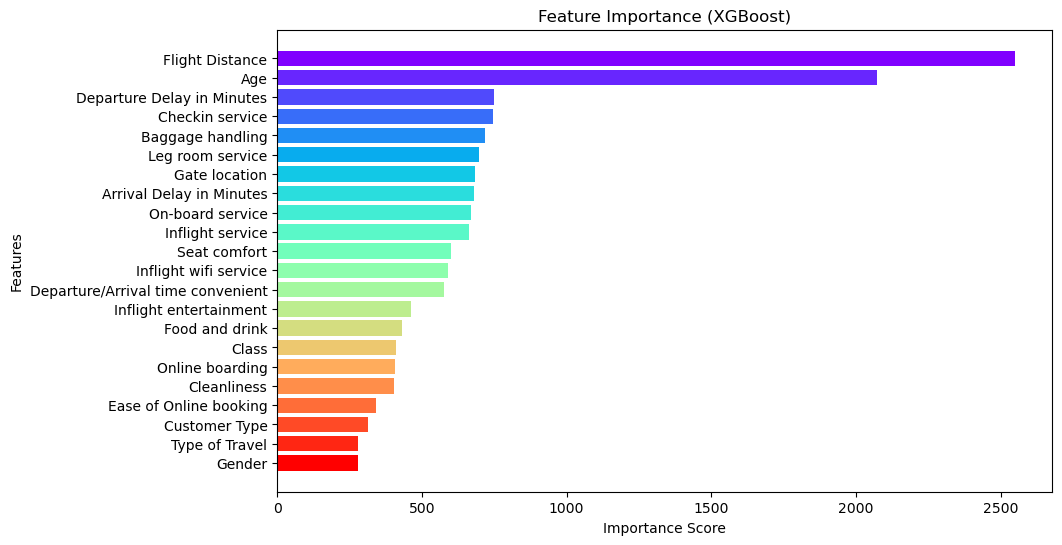

In [136]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [x[0] for x in sorted_importance]
scores = [x[1] for x in sorted_importance]

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(features)))
plt.barh(features, scores, color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis() 
plt.show()

**_`Inference:`_**

- `Flight Distance` & `Age` are most important feature


# Deployment


In [138]:
# Save the final model as a pickle file

with open('final_model_XGBoost.pkl','wb') as file:
    pickle.dump(final_model,file)